In [19]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
img=cv2.imread('./test_images/angelina4.jpg')
img.shape

(568, 474, 3)

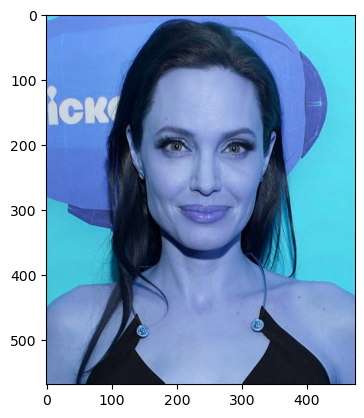

In [39]:
plt.imshow(img)

In [40]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(568, 474)

In [41]:
gray

array([[218, 217, 215, ..., 227, 230, 230],
       [215, 214, 212, ..., 224, 229, 229],
       [212, 211, 209, ..., 221, 227, 227],
       ...,
       [155, 154, 154, ..., 160, 163, 163],
       [156, 156, 155, ..., 162, 164, 164],
       [157, 157, 156, ..., 163, 164, 164]], dtype=uint8)

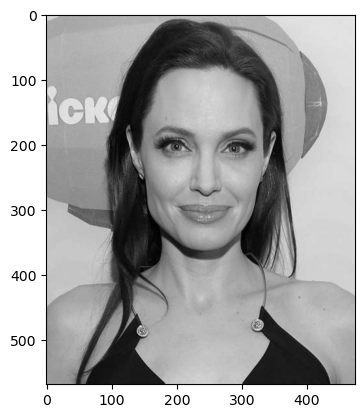

In [42]:
plt.imshow(gray, cmap='gray')

In [43]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[131, 116, 235, 235]], dtype=int32)

In [44]:
(x,y,w,h) = faces[0]
x,y,w,h

(131, 116, 235, 235)

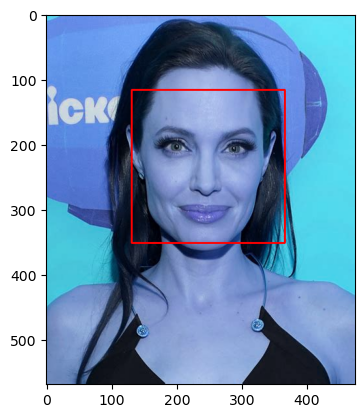

In [45]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

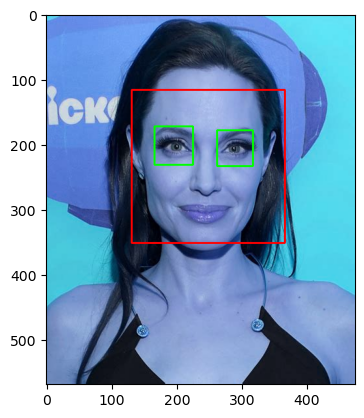

In [46]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

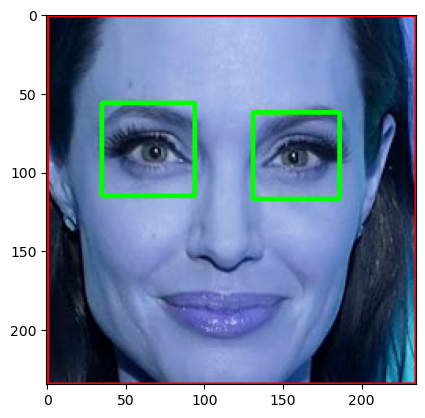

In [47]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [48]:
cropped_img = np.array(roi_color)
cropped_img.shape

(235, 235, 3)